In [17]:

import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:

df = pd.read_csv('blogs.csv')

print("Dataset shape:", df.shape)
print(df.head())

print("\nMissing values:\n", df.isnull().sum())


Dataset shape: (2000, 2)
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

Missing values:
 Data      0
Labels    0
dtype: int64


In [19]:
# Clean text function
def clean_text(text):
    text = str(text).lower()                       # Lowercase
    text = re.sub(r'\[.*?\]', '', text)            # Remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)             # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)                # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)           # Remove words with numbers
    return text

df['Clean_Text'] = df['Data'].apply(clean_text)


In [29]:
df

,Data,Labels,Clean_Text,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path from frank odwyer newsgroups altatheism...,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path from bilokcforumos...,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path from jbrownbatmanbmdtrwcom newsgroups al...,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu newsgroups altat...,Positive
...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupesrvcscmuedu path from fran...,Positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu newsgroups talkr...,Positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupesrvcscmuedu path cantaloupesr...,Positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu path cantaloupesr...,Positive


In [20]:
# Convert text to numerical vectors
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['Clean_Text'])
y = df['Labels']


In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


0.825
                          precision    recall  f1-score   support

             alt.atheism       0.76      0.80      0.78        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.80      0.80      0.80        20
comp.sys.ibm.pc.hardware       0.58      0.70      0.64        20
   comp.sys.mac.hardware       0.83      0.75      0.79        20
          comp.windows.x       0.80      0.80      0.80        20
            misc.forsale       0.89      0.85      0.87        20
               rec.autos       0.86      0.90      0.88        20
         rec.motorcycles       0.89      0.85      0.87        20
      rec.sport.baseball       0.91      1.00      0.95        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.81      0.85      0.83        20
                 sci.med       0.93      0.65      0.76        20
   

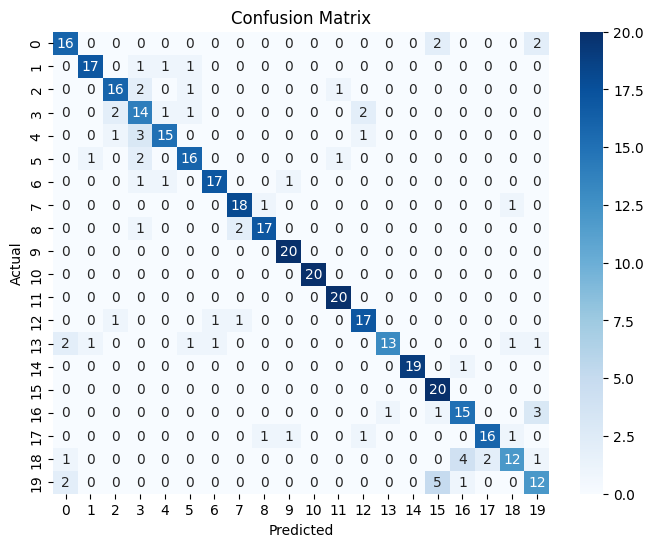

In [27]:
print( accuracy_score(y_test, y_pred))
print( classification_report(y_test, y_pred))


# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Sentiment
Positive    1506
Negative     493
Neutral        1
Name: count, dtype: int64


/tmp/ipython-input-3304045957.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


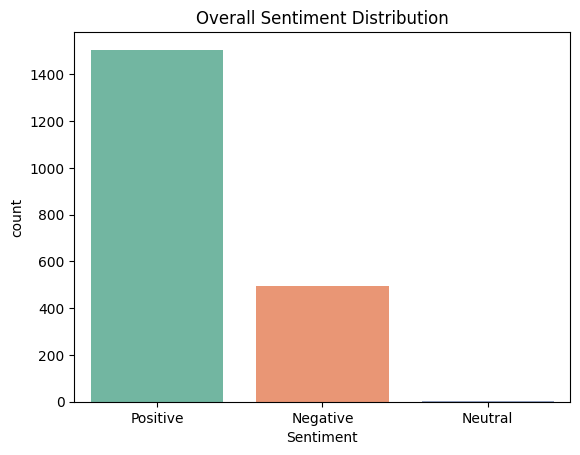

In [24]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Clean_Text'].apply(get_sentiment)

# Sentiment distribution
print(df['Sentiment'].value_counts())

sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Overall Sentiment Distribution")
plt.show()


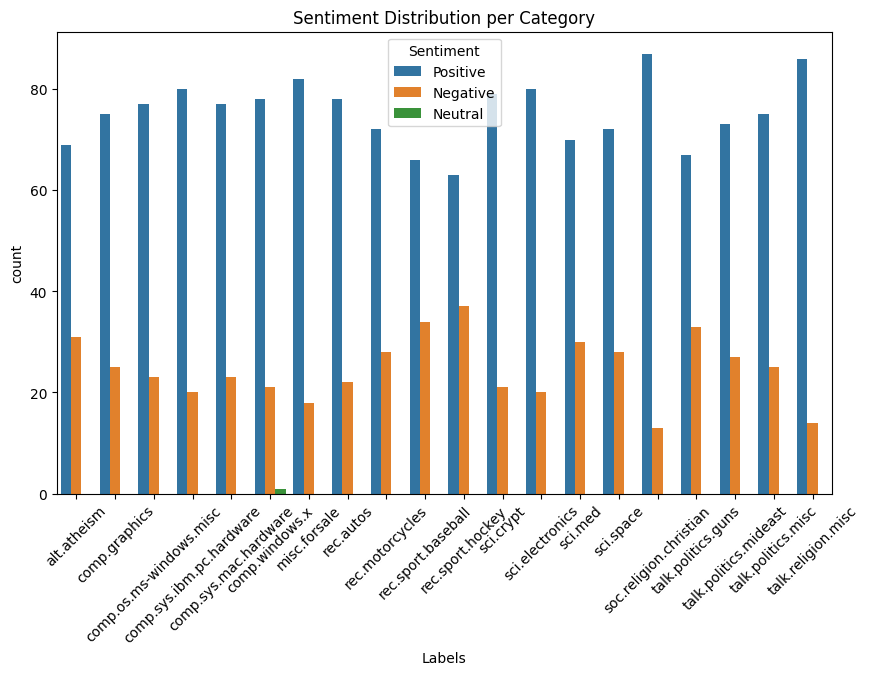

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Labels', hue='Sentiment', data=df)
plt.title("Sentiment Distribution per Category")
plt.xticks(rotation=45)
plt.show()
